# 05.가위바위보 CV Task

### 목차 


-  Project1. rock_scissor_paper : 가위바위보 분류

    - Step (0) 필요한 모듈 import하기
    - Step (1) 데이터 준비
   
    1)데이터 불러오기

    2)resize

    3)mnist.load_data()

    - Step (2) 딥러닝 네트워크 설계
    - Step (3) 딥러닝 네트워크 학습
    - Step (4) 테스트
    - Step (5) 네트워크 향상




회고

# 1.데이터 준비 

In [1]:
# 라이브러리 버전 확인 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
## 코랩 이미지 압축 풀기 
  # %cd 압축을 풀 경로
  # !unzip -qq "압축파일 Path"

## scissor

# %cd /content/drive/MyDrive/Aiffel_data/Exp5/scissor

# !unzip -qq "/content/drive/MyDrive/Aiffel_data/Exp5/scissor.zip"

In [4]:
## paper

# %cd /content/drive/MyDrive/Aiffel_data/Exp5/paper

# !unzip -qq "/content/drive/MyDrive/Aiffel_data/Exp5/paper.zip"

In [5]:
# ## rock

# %cd /content/drive/MyDrive/Aiffel_data/Exp5/rock
# !unzip -qq "/content/drive/MyDrive/Aiffel_data/Exp5/rock.zip"

In [6]:
## 코랩 파일 여러개 삭제 
#[os.remove(f) for f in glob.glob("/content/drive/MyDrive/Aiffel_data/Exp5/*.jpg")]

In [7]:
# 코드 나눠 보기 
type(glob.glob("/content/drive/MyDrive/Aiffel_data/Exp5/*.jpg"))

list

In [8]:
##5. 데이터 불러오기 + Resize

# 가위 이미지

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")
 
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

# image_dir_path = os.getenv('HOME') + "/content/drive/MyDrive/Aiffel_data/Exp5/scissor"
image_dir_path1 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/S/kr_scissor'
image_dir_path2 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/S/scissor'
image_dir_path3 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/S/th_scissor'
image_dir_path4 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/S/yh_scissor'
# print(os.getenv('HOME'))
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4)             

print("가위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
203  images to be resized.
203  images resized.
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [9]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/R/kr_rock'
image_dir_path2 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/R/rock'
image_dir_path3 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/R/th_rock'
image_dir_path4 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/R/yh_rock'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4) 

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
210  images to be resized.
210  images resized.
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [10]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/P/kr_paper'
image_dir_path2 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/P/paper'
image_dir_path3 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/P/th_paper'
image_dir_path4 = '/content/drive/MyDrive/Aiffel_data/Exp5/train/P/yh_paper'


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
163  images to be resized.
163  images resized.
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [11]:
n1, n2, n3, n4 = 5, 3, 3, 3

np.zeros(n1*n2*n3*n4,dtype=np.int32).reshape(5,3,3,3)

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=int32)

In [12]:
import numpy as np

def load_data(img_path, number_of_data=1476):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    print(imgs.shape)
    idx=0
    for file in glob.iglob(img_path+'/S/*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    print(idx)
    for file in glob.iglob(img_path+'/R/*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/P/*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Aiffel_data/Exp5/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

(1476, 28, 28, 3)
503
학습데이터(x_train)의 이미지 개수는 1476 입니다.
x_train shape: (1476, 28, 28, 3)
y_train shape: (1476,)


라벨:  0


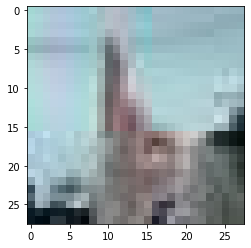

In [13]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
print('라벨: ', y_train[0])

# 2. 딥러닝 네트워크 설계

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


Model에 추가된 Layer 개수:  7


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

# 3. 딥러닝 네트워크 학습

In [16]:
# model을 학습
# model.compile()과 model.fit() 사용

In [17]:
# epochs=10 은 전체 300개의 데이터를 10번 반복 사용

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
47/47 [==============================] - 2s 4ms/step - loss: 3.0227 - accuracy: 0.5068
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8388
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9377
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9885
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 9/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/10
47/47 [==============================] - 0s 3ms/step - loss: 9.6066e-04 - accuracy: 1.0000


#4 테스트
###1.우선 테스트용 데이터인 x_test, y_test를 만들기

: x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

###2.훈련시킨 model을 사용하여 test_accuracy를 측정하기

: model.evaluate()을 사용해 봅시다.


In [18]:

# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

# 가위
image_dir_path = '/content/drive/MyDrive/Aiffel_data/Exp5/test/S/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 
image_dir_path = '/content/drive/MyDrive/Aiffel_data/Exp5/test/R/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보
image_dir_path = '/content/drive/MyDrive/Aiffel_data/Exp5/test/P/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [19]:
image_dir_path = "/content/drive/MyDrive/Aiffel_data/Exp5/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

(300, 28, 28, 3)
100
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


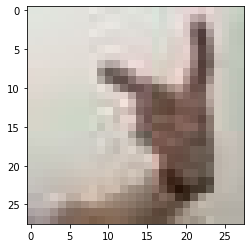

In [20]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
print('라벨: ', y_test[0])

In [21]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.4597 - accuracy: 0.6000 - 176ms/epoch - 18ms/step
test_loss: 2.459695339202881 
test_accuracy: 0.6000000238418579


# 5. 네트워크 향상시키기


시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 

만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=40
n_train_epoch=30


model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 40)               

# 회고

### - 이번 프로젝트에서 **어려웠던 점**.
Convolution Neural Network 전반적인 개념의 이해가 어려웠지만 유튜브를 통해 조금은 이해가 가게 되었다.

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

{알아낸점}
 *  **glob.iglob** :   for file in glob.iglob(img_path+'/S/\*/\*.jpg')
 새로운 데이터를 통합할때 glob 함수를 사용한다.

 * **def load_data(img_path, number_of_data=1476)**:
 number_of_data  300> 1476 으로 수정한다.
 0으로 초기화 하는 개수를 데이터수로 한정해 준다.

 * 코랩 이미지 압축 풀기 
  > %cd 압축을 풀 경로
   !unzip -qq 

### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

1. 오버피팅을 방지하기 위해 train_data 수를 300> 1476으로 늘렸다.
2. 하이퍼파라미터 epoch 을 30으로 증가시켰다. 





>#### **루브릭평가 지표**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1| 이미지 분류기 모델이 성공적으로 만들어졌다. |트레이닝이 정상적으로 수행되었다.|
>|2|오버피팅을 극복하기 위한 적절한 시도가 있었다.| 데이터셋의 다양성, 정규화 등의 시도가 적절하였다.|
>|3|분류모델의 test accuracy가 기준 이상 높게 나왔다.|60% 이상 도달하였다.|


### - ** 참고 ** 
CNN : https://www.cs.cmu.edu/~aharley/vis/conv/flat.html

glob:  https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=siniphia&logNo=221397012627



케라스 Sequential(유튜브) : https://www.youtube.com/watch?v=UNc6u2nL7aA

### - **자기 다짐**

* 다른 사람에게 코드 설명해보기